In [58]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Mixed State Generator

## Partial Trace Method 
N=4, pure ---> N=2, mixed

1. Create a **random pure state** vector for the combined system (N=4, linearcombination of random basis with random coeffs)
2. Create a 4x4 **density matrix** from random state vector above
3. Perform **partial trace** on any 2x2 base (resulting mixed 2x2 density matrix is independent of the chosen base traced over)

In [ ]:
# Positive semi-definiteness condition
    # eigvals = np.linalg.eigvals(rho)
    # if not np.all(eigvals >= -1e10):
    #     print('recursive', eigvals)
    #     return create_pure_rho(nqubits)

In [59]:
np.random.uniform(size=(4,4))

array([[0.27359421, 0.92458535, 0.7548901 , 0.84353209],
       [0.86661725, 0.19520379, 0.30075583, 0.00651686],
       [0.81796008, 0.65699117, 0.37576966, 0.77879722],
       [0.74684248, 0.54130472, 0.95860731, 0.23041719]])

In [60]:
def create_invertible():
    mat = np.random.uniform(size=(4,4))
    if np.abs(np.linalg.det(mat)) < 1e-10:     # eps to avoid rounding errors
        return create_invertible()
    return mat

def create_combined_pure():
    basis = create_invertible()
    coeffs = np.random.uniform(size=4)
    coeffs = coeffs / np.sum(coeffs)

    rho = np.zeros((4,4))
    for i, vec in enumerate(basis):
        vec = vec / np.linalg.norm(vec)
        rho += coeffs[i] * np.outer( vec, vec)
    return rho

# Test
A = create_combined_pure()
A
np.trace(A)



array([[0.18692272, 0.28656388, 0.15000764, 0.19635436],
       [0.28656388, 0.45312338, 0.22295518, 0.31061815],
       [0.15000764, 0.22295518, 0.13370218, 0.15040043],
       [0.19635436, 0.31061815, 0.15040043, 0.22625172]])

0.9999999999999999

In [61]:
def partial_trace(rho, basis=np.array([[1,0], [0,1]])):
    #trace is performed on traced basis
    reduced = np.zeros((2,2))
    for i in range(2):
        bra = np.kron(np.eye(2), basis[i])
        reduced += bra.dot(rho.dot(bra.T))
    return reduced

# Test
partial_trace(create_combined_pure(), basis=np.array([[1,0], [0,1]]))



array([[0.62964981, 0.39288748],
       [0.39288748, 0.37035019]])

In [75]:
combined = create_combined_pure()
print('combined system\n', combined)

reduced = partial_trace(combined, basis=np.array([[1,0], [0,1]]))
print('\nreduced system\n', reduced)

np.trace(reduced.dot(reduced))


combined system
 [[0.25156714 0.23505975 0.13411604 0.21146494]
 [0.23505975 0.27465472 0.19177191 0.27881752]
 [0.13411604 0.19177191 0.15435337 0.20753228]
 [0.21146494 0.27881752 0.20753228 0.31942477]]

reduced system
 [[0.52622186 0.41293356]
 [0.41293356 0.47377814]]


0.8424034297580758

In [76]:
# Define Wrapper function

def random_mixed_1qubit():
    ket = partial_trace(create_combined_pure())
    return ket.dot(ket)

#### Not used

theta = 2.7343323752455455


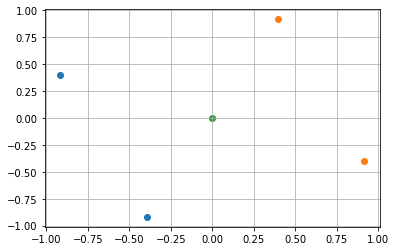

<Figure size 432x432 with 0 Axes>

In [64]:

def randONB2d():
    theta = np.random.uniform() * 2*np.pi
    print(f'theta = {theta}')
    vec1 = np.array([np.cos(theta), np.sin(theta)])
    vec2 = np.array([-vec1[1], vec1[0]])
    return np.array([vec1, vec2])

basis = randONB2d()
plt.scatter(basis[:,0], basis[:,1])
plt.scatter(-basis[:,0], -basis[:,1])
plt.scatter(0,0)
plt.grid()
plt.figure(figsize=(6,6));

## Evolution Method

In [65]:
def rho_eigenbase(N, pure=False):
    if pure:
        # One diagonal is 1, else 0
        rnum = np.random.randint(N)
        rho = np.zeros(N)
        rho[rnum] = 1
        return np.diag(rho)
    
    # Mixed states
    rho = np.random.uniform(size=N)
    return np.diag(rho/np.sum(rho))

# Check created matrices
print('Pure state in eigenbase:')
rho_eigenbase(3, pure=True)

print('Mixed state in eigenbase:')
mat = rho_eigenbase(3, pure=False)
mat
np.trace(mat)

Pure state in eigenbase:


array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Mixed state in eigenbase:


array([[0.09873932, 0.        , 0.        ],
       [0.        , 0.47141058, 0.        ],
       [0.        , 0.        , 0.4298501 ]])

1.0

In [66]:
def create_unitary(N):
    rand_mat = np.random.uniform(size=(N,N))
    q, _ = np.linalg.qr(rand_mat)
    return q, np.matrix(q).H 

# Check Unitarity
U, U_dag = create_unitary(3)
np.round( U.dot(U_dag), 10)
    

array([[ 1.,  0., -0.],
       [ 0.,  1., -0.],
       [-0., -0.,  1.]])

### Find random 4D basis

In [ ]:


def create_invertible():
    mat = np.random.uniform(low=-1, high=1, size=(4,4)) #   +  1j * np.random.uniform(low=-1, high=1, size=(4,4))   # or complex??
    if np.abs(np.linalg.det(mat)) < 1e-10:     # eps to avoid rounding errors
        return create_invertible()
    return mat

def create_unitary(N):
    rand_mat = np.random.uniform(size=(N,N)) + 1j * np.random.uniform(size=(N,N))
    q, _ = np.linalg.qr(rand_mat)
    return q, np.matrix(q).H 

U, Udag = create_unitary(4)
(U.dot(Udag) - np.eye(4)) < 1e10

In [67]:
def rho_arbitrary(N, pure=False):
    rho = rho_eigenbase(N, pure)
    U, U_dag = create_unitary(N)
    return( U.dot( rho.dot(U_dag)))


# Check the generator
for N in range(10):
    rho = rho_arbitrary(N)

    ## Check trace condition
    assert np.abs( np.trace(rho)-1 ) < 1e10

    ## Check Positivity
    assert np.all(np.linalg.eigvals(rho) >= 0)


# 1-Qubit Measurement

Habe ich mit bloch vektoren alle möglichen observablen abgedeckt?

State Tomography: How many measurements are needed to correctly identify the state? 3^n for pure

For 1-Qubit: 3 Measurements are needed
--> Bloch vector

Simple Approach: make much more measurements: 100

1. generate Random vectors m to measure along
2. measure along each m very often

In [102]:
rho = random_mixed_1qubit()
rho
np.trace(rho)

array([[0.42649714, 0.31406804],
       [0.31406804, 0.28131871]])

0.7078158504151388

In [123]:
def bloch2mat(vec):
    assert vec.shape[0] == 3
    s1 = np.matrix([[0,1],[1,0]])
    s2 = np.matrix([[0,-1j],[1j,0]])
    s3 = np.matrix([[1,0],[0,-1]])

    r_sig = vec[0] * s1 + vec[1] * s2 + vec[2] * s3

    return (np.eye(2) + r_sig) /2

def random_pure_1qubit():
    vec = np.random.uniform(size=3)
    vec = vec / np.sum(vec)
    return bloch2mat(vec)

plt.plot(0.0)

np.trace(random_pure_1qubit())


(1+0j)

In [143]:
# Generate random measurements 
m_amt = 100
observables = np.array([random_pure_1qubit() for _ in range(m_amt)])
measurements = np.array([np.trace(observables[i].dot(rho)) for i in range(m_amt)])
measurements.astype('float')

measurements.mean()
measurements.std()

/var/folders/tn/nyh0947d6sngjfvtp7hbb0jr0000gn/T/ipykernel_13923/2435236254.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  measurements.astype('float')


array([0.52344108, 0.50240809, 0.46956594, 0.40314906, 0.49056638,
       0.51607291, 0.43303976, 0.54837327, 0.46689698, 0.5052663 ,
       0.44373833, 0.50573743, 0.46717316, 0.41167267, 0.48291735,
       0.51085987, 0.55317235, 0.50535415, 0.49235587, 0.50989331,
       0.49004823, 0.48823586, 0.43476592, 0.42811715, 0.50359303,
       0.45337383, 0.49692556, 0.50528809, 0.42856551, 0.52842929,
       0.53203745, 0.58531766, 0.42710705, 0.496427  , 0.45390841,
       0.46749189, 0.38136378, 0.42386976, 0.39834327, 0.54473311,
       0.45578699, 0.49664059, 0.49846916, 0.48882868, 0.39771417,
       0.5977213 , 0.48092611, 0.42226933, 0.51795426, 0.44098879,
       0.42972063, 0.49236867, 0.48249766, 0.51944302, 0.42008591,
       0.43875123, 0.53980775, 0.4664523 , 0.45366856, 0.45979775,
       0.54493595, 0.38213869, 0.53402597, 0.42950479, 0.41072103,
       0.51666457, 0.52691317, 0.46333365, 0.45711813, 0.475425  ,
       0.49782042, 0.53417912, 0.59470391, 0.5813761 , 0.50798

array([0.52344108+0.j, 0.50240809+0.j, 0.46956594+0.j, 0.40314906+0.j,
       0.49056638+0.j])

(0.47967368804405197+0j)

0.05033943245876593

ModuleNotFoundError: No module named 'torch'